# Importing Necessary Libraries and Data

In [1]:
import pandas as pd
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
pio.templates.default = 'plotly_dark'
pio.renderers.default = 'png'
def custom(t, x, y):
    fig.update_layout(
        title = t,
        xaxis_title = x,
        yaxis_title = y,
        font_color = '#ff8c00',
        title_font_color = '#00fe35'
    )

In [2]:
df = pd.read_csv(
    filepath_or_buffer = '../Data/all_currencies_clean_table.csv',
    index_col = ['Name', 'Symbol']
)

In [3]:
df.head()

,,MarketCap,Price,Circulate,Volume,Hourly,Daily,Weekly
Name,Symbol,,,,,,,
bitcoin,BTC,1.507030e+11,8940.740000,1.685576e+07,8.103300e+09,-0.63,11.22,3.58
ethereum,ETH,8.754697e+10,897.729000,9.752049e+07,3.062570e+09,-0.41,11.99,-0.25
ripple,XRP,4.062771e+10,1.041490,3.900922e+10,2.504810e+09,-0.37,32.86,23.94
bitcoincash,BCH,2.294639e+10,1353.040000,1.695914e+07,1.149550e+09,0.11,7.89,18.32
cardano,ADA,1.163729e+10,0.448847,2.592707e+10,7.603720e+08,-0.71,27.62,23.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1142 entries, ('bitcoin', 'BTC') to ('enigmaproject', 'XNG')
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MarketCap  1142 non-null   float64
 1   Price      1142 non-null   float64
 2   Circulate  1142 non-null   float64
 3   Volume     1142 non-null   float64
 4   Hourly     1142 non-null   float64
 5   Daily      1142 non-null   float64
 6   Weekly     1142 non-null   float64
dtypes: float64(7)
memory usage: 149.3+ KB


In the above dataset, we can see data about 1142 different cryptocurrencies at a static point in time (i.e. 02/09/2018 12:10pm).  
Which makes all the datapoints unrelated except for the fact that all of them represent a certain cryptocurrency.  
Thus one could say that all this data picked feature-wise would be discrete data.

In [5]:
tr = pd.read_csv(
    filepath_or_buffer = '../Data/clean_cryptocurrency_prices_by_date.csv',
    index_col = 0,
    parse_dates = [2],
    infer_datetime_format = '%d-%m-%Y %H:%M:%S',
    dayfirst = True
)

In [6]:
tr.head()

,Coin,Date,Price
0,0x,2017-08-16 14:09:21,0.111725
1,0x,2017-08-17 15:05:05,0.211486
2,0x,2017-08-18 15:04:52,0.283789
3,0x,2017-08-19 15:05:08,0.511434
4,0x,2017-08-20 15:05:03,0.429522


In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570927 entries, 0 to 570926
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Coin    570927 non-null  object        
 1   Date    570927 non-null  datetime64[ns]
 2   Price   570927 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.4+ MB


In [8]:
tr.head()

,Coin,Date,Price
0,0x,2017-08-16 14:09:21,0.111725
1,0x,2017-08-17 15:05:05,0.211486
2,0x,2017-08-18 15:04:52,0.283789
3,0x,2017-08-19 15:05:08,0.511434
4,0x,2017-08-20 15:05:03,0.429522


In this dataset, we can see how price changes over a certain period of time where the cryptocurrency exists.  
Our time period of interest being 2014-2018 as that is when the cryptocurrency market boomed.  

In [9]:
outliers = ['bitcoin', 'ethereum', 'ripple', 'bitcoincash', 'bit20', 'projectx', '42coin', 'sprouts', 'paccoin', 'kin', 'dimecoin', 'fedoracoin', 'unityingot', 'ecoin']

These are all the observed outliers based on the first three features.  
And two observational ones from the trend visualizations which are unityingot and ecoin because of their magnanimous change percentages.

In [10]:
df = df.loc[list(filter(lambda l: l not in outliers, df.index.get_level_values(0)))]
name = pd.Series(df.index.get_level_values(0))
df.head()

,,MarketCap,Price,Circulate,Volume,Hourly,Daily,Weekly
Name,Symbol,,,,,,,
cardano,ADA,1.163729e+10,0.448847,2.592707e+10,760372000.0,-0.71,27.62,23.61
litecoin,LTC,9.109557e+09,165.179000,5.514961e+07,769065000.0,-1.62,13.37,28.81
stellar,XLM,8.047186e+09,0.436583,1.843220e+10,212032000.0,0.05,21.88,14.83
neo,NEO,7.740330e+09,119.082000,6.500000e+07,304126000.0,-1.08,6.72,2.78
eos,EOS,6.547181e+09,9.929270,6.593819e+08,606048000.0,-1.05,19.34,6.47


## The Appropriate Features

### MarketCap

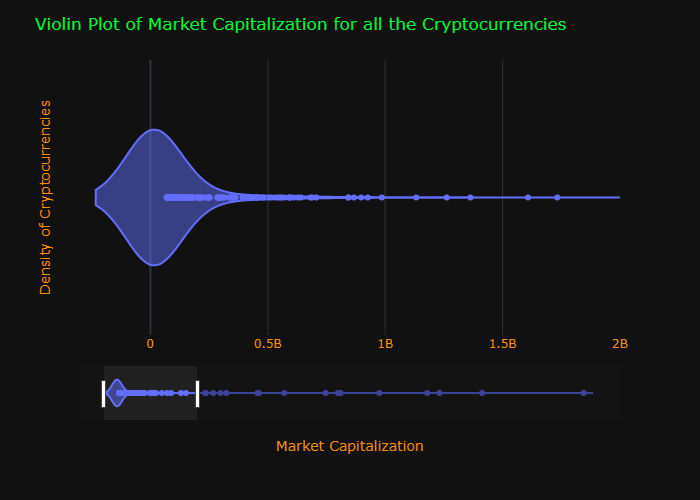

In [11]:
fig = px.violin(
    data_frame = df,
    x = 'MarketCap',
    hover_data = df,
    hover_name = name
)
custom(
    x = 'Market Capitalization',
    y = 'Density of Cryptocurrencies',
    t = 'Violin Plot of Market Capitalization for all the Cryptocurrencies'
)
fig.update_xaxes(
    rangeslider_visible = True,
    rangeslider_bgcolor = '#202020',
    range = [-3e8, 2e9]
)
fig.show()

### Price

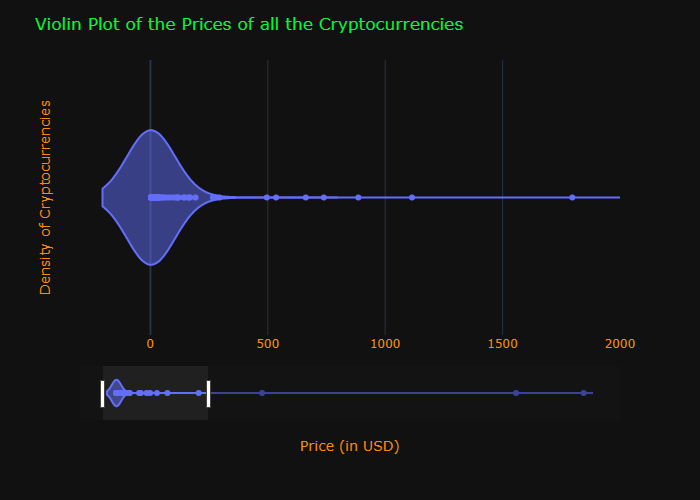

In [12]:
fig = px.violin(
    data_frame = df,
    x = 'Price',
    hover_data = df,
    hover_name = name
)
custom(
    t = 'Violin Plot of the Prices of all the Cryptocurrencies',
    x = 'Price (in USD)',
    y = 'Density of Cryptocurrencies'
)
fig.update_xaxes(
    rangeslider_visible = True,
    rangeslider_bgcolor = '#202020',
    range = [-3e2, 2e3]
)
fig.show()

### Circulating Supply

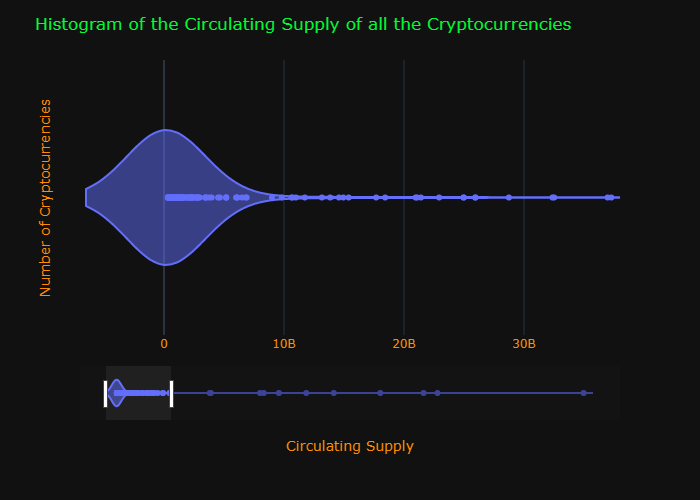

In [13]:
fig = px.violin(
    data_frame = df,
    x = 'Circulate',
    hover_data = df,
    hover_name = name
)
custom(
    t = 'Histogram of the Circulating Supply of all the Cryptocurrencies',
    x = 'Circulating Supply',
    y = 'Number of Cryptocurrencies'
)
fig.update_xaxes(
    rangeslider_visible = True,
    rangeslider_bgcolor = '#202020',
    range = [-7e9, 38e9]
)
fig.show()

After the removal of the 12 outliers, our data looks quite similar even though a bit more spread out.  
This is because there will always be values that easily dominate the rest because of the pareto principle.

## Price Percentage Changes (Hourly, Daily and Weekly trend)

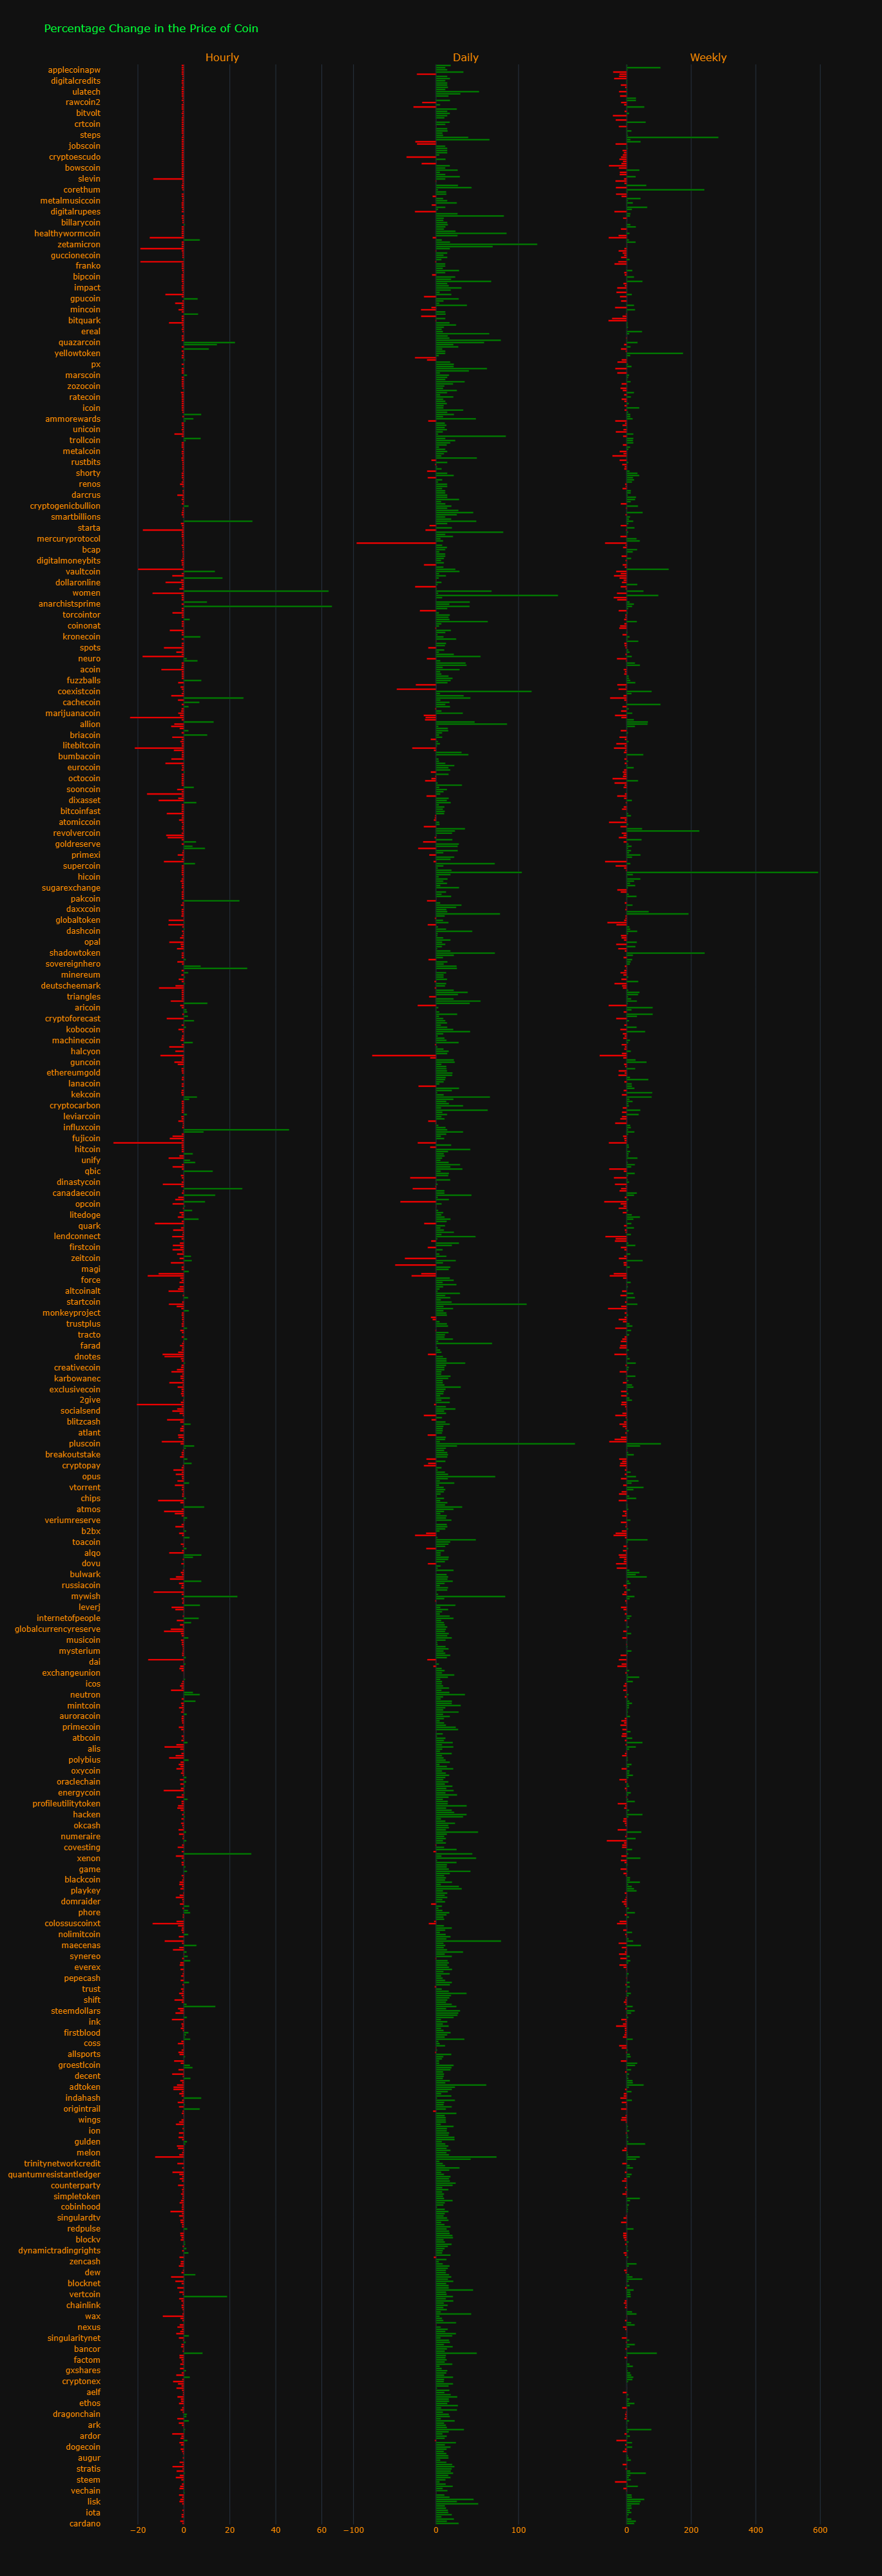

In [14]:
fig = make_subplots(
    cols = 3,
    shared_yaxes = True,
    horizontal_spacing = 0,
    subplot_titles = ['Hourly', 'Daily', 'Weekly']
)
fig.add_bar(
    x = df.Hourly,
    y = name,
    name = 'Hourly',
    orientation = 'h',
    showlegend = False,
    marker_color = df.Hourly.apply(lambda l: 'green' if l > 0 else 'red'),
    row = 1,
    col = 1
)
fig.add_bar(
    x = df.Daily,
    y = name,
    name = 'Daily',
    orientation = 'h',
    showlegend = False,
    marker_color = df.Daily.apply(lambda l: 'green' if l > 0 else 'red'),
    row = 1,
    col = 2
)
fig.add_bar(
    x = df.Weekly,
    y = name,
    name = 'Weekly',
    orientation = 'h',
    showlegend = False,
    marker_color = df.Weekly.apply(lambda l: 'green' if l > 0 else 'red'),
    row = 1,
    col = 3
)
fig.update_layout(
    height = 4000,
    width = 1369,
    title = 'Percentage Change in the Price of Coin',
    font_color = '#ff8c00',
    title_font_color = '#00fe35'
)
fig.show()

From this graph, we can see, that on an hourly basis, the market is very bearish, since we have more red bars than green.  
However on a daily basis, the market is extremely bullish, since we have way more greens than reds and there is a lot of strength in the trend.  
On a weekly basis, we have almost equal number of reds and greens, but the greens are way taller than the reds.  
This implies that the market is following a slightly weak bullish trend.  

## Volatility

In [15]:
volatility = name.apply(lambda l: tr[tr.Coin == l].Price.std())
df['Volatility'] = volatility.values
df.head()

,,MarketCap,Price,Circulate,Volume,Hourly,Daily,Weekly,Volatility
Name,Symbol,,,,,,,,
cardano,ADA,1.163729e+10,0.448847,2.592707e+10,760372000.0,-0.71,27.62,23.61,0.310058
litecoin,LTC,9.109557e+09,165.179000,5.514961e+07,769065000.0,-1.62,13.37,28.81,45.002213
stellar,XLM,8.047186e+09,0.436583,1.843220e+10,212032000.0,0.05,21.88,14.83,0.100708
neo,NEO,7.740330e+09,119.082000,6.500000e+07,304126000.0,-1.08,6.72,2.78,34.842500
eos,EOS,6.547181e+09,9.929270,6.593819e+08,606048000.0,-1.05,19.34,6.47,4.345754


In the above code cell, we calculate the volatility of each cryptocurrency.  
We calculate it by taking the standard deviation of the price over their respective active time period.

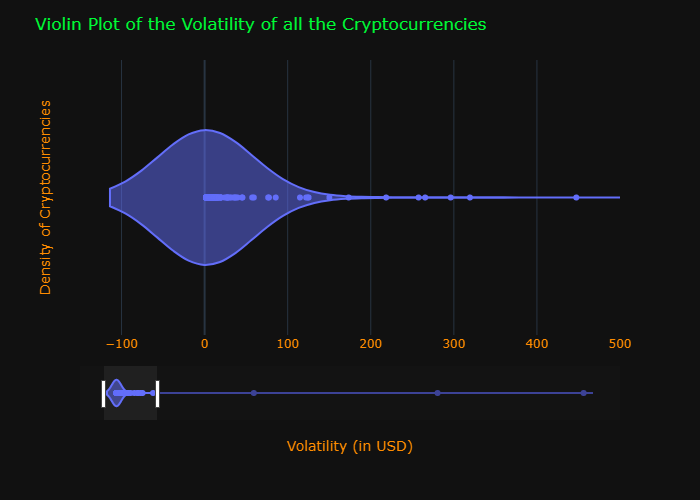

In [16]:
fig = px.violin(
    data_frame = df,
    x = 'Volatility',
    hover_data = df,
    hover_name = name
)
custom(
    t = 'Violin Plot of the Volatility of all the Cryptocurrencies',
    x = 'Volatility (in USD)',
    y = 'Density of Cryptocurrencies'
)
fig.update_xaxes(
    rangeslider_visible = True,
    rangeslider_bgcolor = '#202020',
    range = [-150, 500]
)
fig.show()

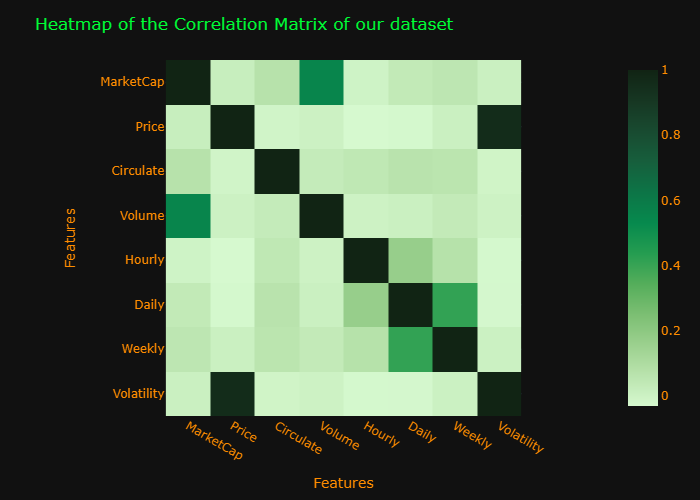

In [17]:
fig = px.imshow(
    df.corr(),
    color_continuous_scale = 'algae'
)
fig.update_layout(
    title = 'Heatmap of the Correlation Matrix of our dataset',
    xaxis_title = 'Features',
    yaxis_title = 'Features',
    font_color = '#ff8c00',
    title_font_color = '#00fe35'
)
fig.show()

- From the above _Heatmap_ we can observe 3 pairs with high correlation. The highest correlation is between the features __Price__ and __Volatility__, followed by the correlation between __Volume__ and __Market Capitalization__ and the last being __Daily Price change__ and __Weekly Change.__  
- We observe very high correlation between __Price__ and __Volatility__. A possible reason could be that popular coins generally have a high __Volatility__, since people from all corners of the world, at all times of the day trade them. And we can expect the higher __Price__ as a direct consequence of high popularity.  
- High correlation between __Volume__ and __Market Capitalization__ stems from the fact that __Market Capitalization__ is the product of the total number of coins in __Circulation__ and the __Price__ of the coin in the market.  
- Correlation between __Daily Price Change__ and __Weekly Price Change__ is relatively low but substantial enough. The most possible reason can be that our dataset encompasses the late 2017 period, which was the time when cryptocurrencies became very popular. And since that period was very bullish, a coin which experiences a rising trend on a __Weekly__ basis was ought to experience a rising trend on a __Daily__ basis. Hence we have a slight correlation between the two features.

## Price vs Volatility

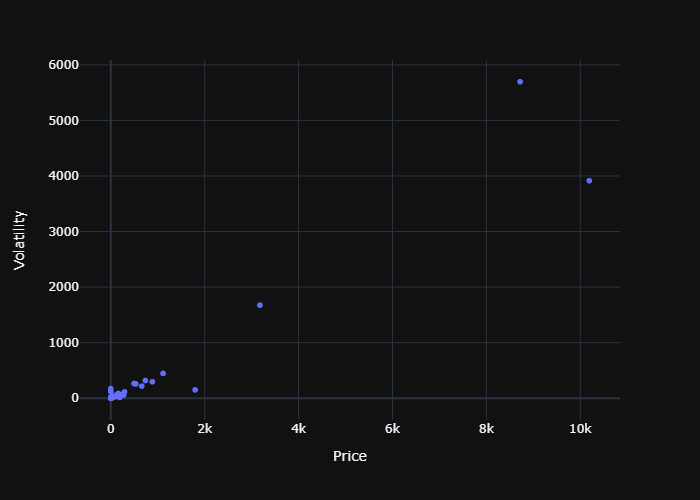

In [18]:
px.scatter(df, x = 'Price', y = 'Volatility')

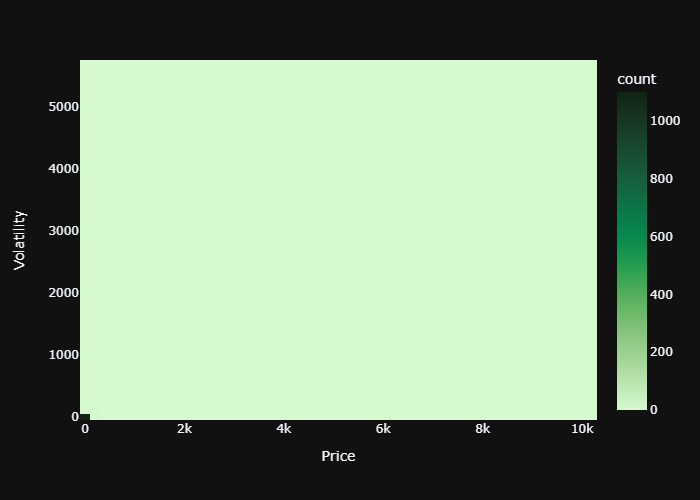

In [19]:
px.density_heatmap(df, x = 'Price', y = 'Volatility', color_continuous_scale = 'algae')

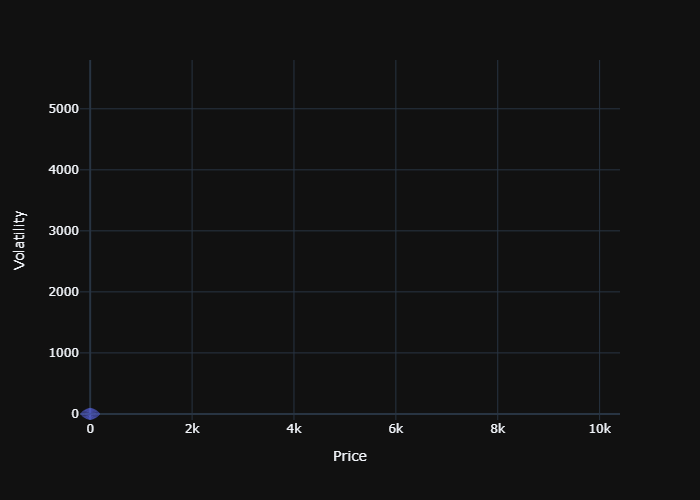

In [20]:
px.density_contour(df, x = 'Price', y = 'Volatility')

## Market Capitalization vs Volume

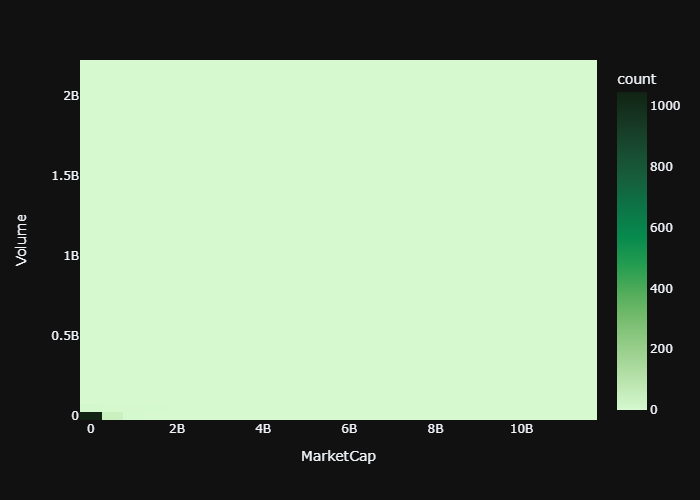

In [21]:
px.density_heatmap(df, x = 'MarketCap', y = 'Volume', color_continuous_scale = 'algae')

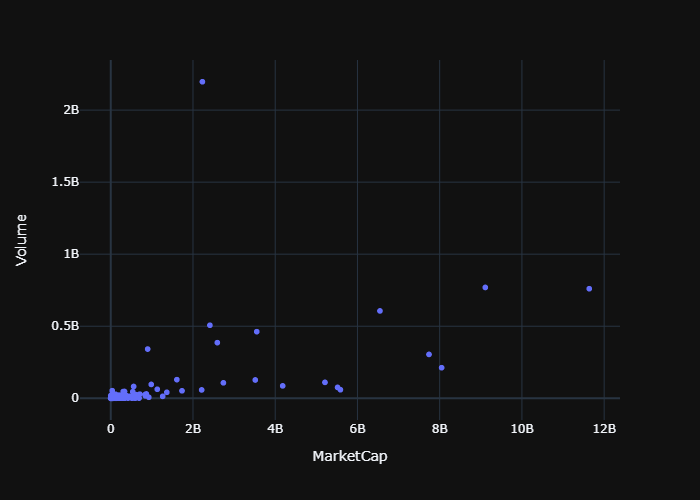

In [22]:
px.scatter(df, x = 'MarketCap', y = 'Volume', color_continuous_scale = 'algae')

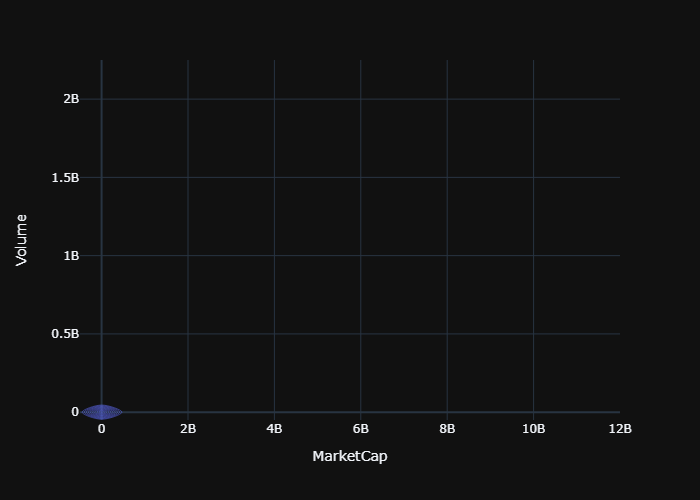

In [23]:
px.density_contour(df, x = 'MarketCap', y = 'Volume')

## Daily vs Weekly

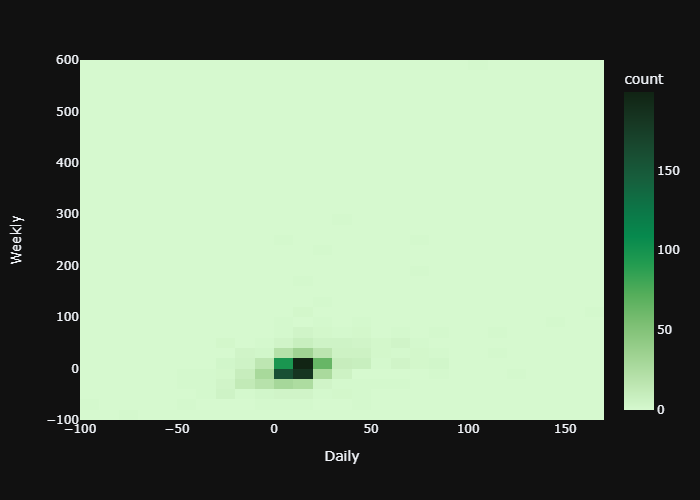

In [24]:
px.density_heatmap(df, x = 'Daily', y = 'Weekly', color_continuous_scale = 'algae')

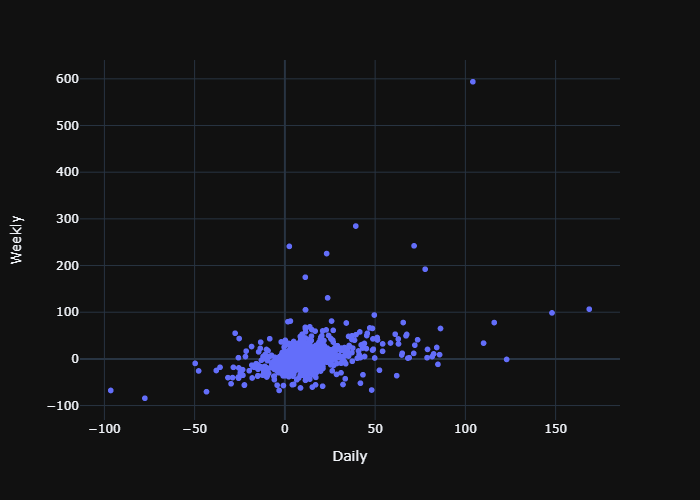

In [25]:
px.scatter(df, x = 'Daily', y = 'Weekly')

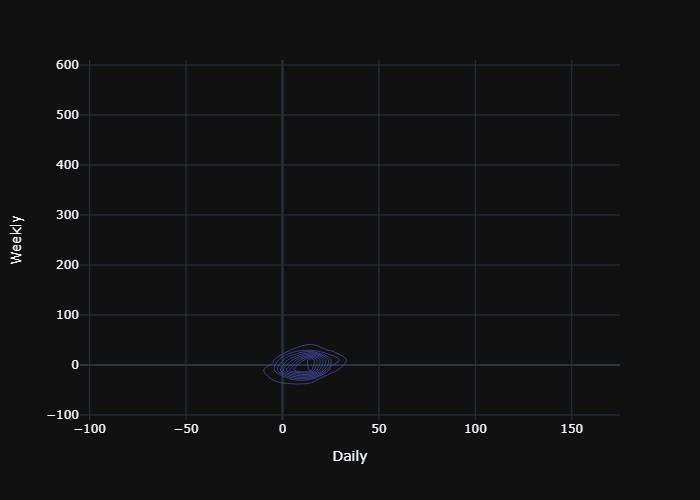

In [26]:
px.density_contour(df, x = 'Daily', y = 'Weekly')